In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
#from glob import glob

In [ ]:
#VGG takes 224*224 as input image size
IMAGE_SIZE = [224, 224]      

#Defining the pathof training and test data
train_path = '/content/drive/MyDrive/Data_Maize1/Train'
test_path = '/content/drive/MyDrive/Data_Maize1/Test'

In [ ]:
#Importing VGG19 architecture from keras framework
#VGG is trained on imagenet dataset
Vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
#Freezing the layers of the architecture
for layer in Vgg.layers:
    layer.trainable = False

In [ ]:
#Flatten the last layer of VGG19
x = Flatten()(Vgg.output)

#Applying l2 regularization to overcome overfitting
x1 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0004))(x)

#Applying softmax optimizer to the output layer
prediction = Dense(6, activation='softmax')(x1)

model = Model(inputs=Vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
#Defining which loss and optimizers to apply
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [ ]:
#Defining callbacks to prevent overfitting
model_callbacks = [
                   EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, mode="min", restore_best_weights=True),
                   ModelCheckpoint('/content/drive/MyDrive/models/VGG19_negative.h5', monitor="val_loss",save_best_only=True,mode="min")
]

In [ ]:
#Rescaled for easy computation and giving 20% dataset to the validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2,)

In [ ]:
#Generating training set
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset='training',
                                                 class_mode = 'categorical')

Found 2160 images belonging to 6 classes.


In [ ]:
#Generating validation dataset
val_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            subset='validation',
                                            class_mode = 'categorical')

Found 539 images belonging to 6 classes.


In [ ]:
#Training the model according to the dataset
r = model.fit(
  training_set,steps_per_epoch=len(training_set),
  validation_data=val_set,validation_steps=len(val_set),
  epochs=100,
  callbacks=model_callbacks
)

Epoch 1/100
68/68 [==============================] - 92s 1s/step - loss: 2.1814 - accuracy: 0.6041 - val_loss: 0.3671 - val_accuracy: 0.8998
Epoch 2/100
68/68 [==============================] - 91s 1s/step - loss: 0.2860 - accuracy: 0.9313 - val_loss: 0.4084 - val_accuracy: 0.8794
Epoch 3/100
68/68 [==============================] - 91s 1s/step - loss: 0.1716 - accuracy: 0.9707 - val_loss: 0.3309 - val_accuracy: 0.9202
Epoch 4/100
68/68 [==============================] - 91s 1s/step - loss: 0.1388 - accuracy: 0.9820 - val_loss: 0.3028 - val_accuracy: 0.9165
Epoch 5/100
68/68 [==============================] - 91s 1s/step - loss: 0.1069 - accuracy: 0.9920 - val_loss: 0.2996 - val_accuracy: 0.9202
Epoch 6/100
68/68 [==============================] - 92s 1s/step - loss: 0.0809 - accuracy: 0.9966 - val_loss: 0.3241 - val_accuracy: 0.8942
Epoch 7/100
68/68 [==============================] - 91s 1s/step - loss: 0.0793 - accuracy: 0.9975 - val_loss: 0.3264 - val_accuracy: 0.9109
Epoch 8/100
6

In [ ]:
import matplotlib.pyplot as plt

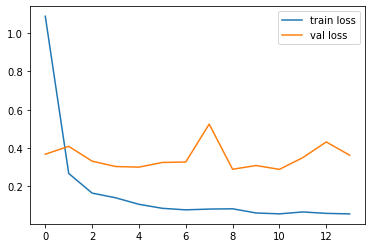

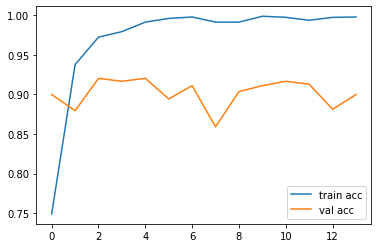

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting the graph

#loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_loss')

#accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_acc')

In [ ]:
#Testing
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32)

Found 605 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model1=load_model('/content/drive/MyDrive/models/model_VGG19_negative.h5')

OSError: ignored

In [ ]:
#Evaluating the test set
y_pred1 = model1.evaluate(test_set)